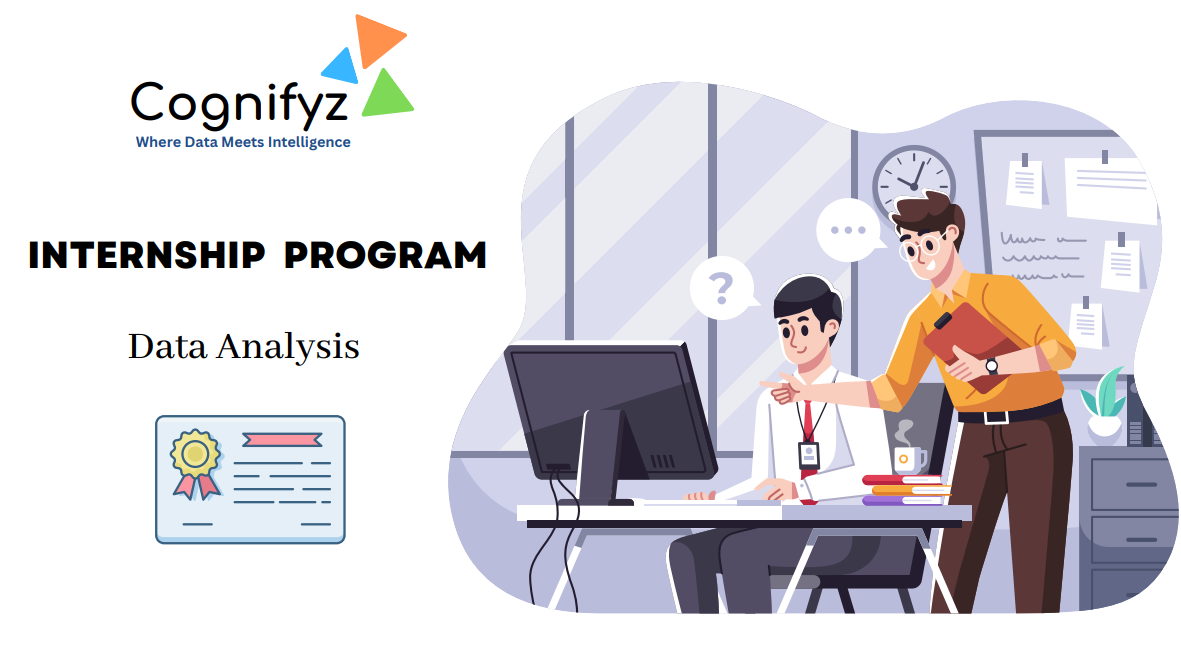

In [1]:
import pandas as pd

df = pd.read_csv('Restaurant Dataset.csv')
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price_range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [2]:
df['Cuisines']=df['Cuisines'].fillna('Unknown')#fill missing values 
df['Cuisines']=df['Cuisines'].str.split(', ')#split the cusines  and explde the list into seperate row
df_exploded=df.explode('Cuisines')
Cuisines_counts=df_exploded['Cuisines'].value_counts()

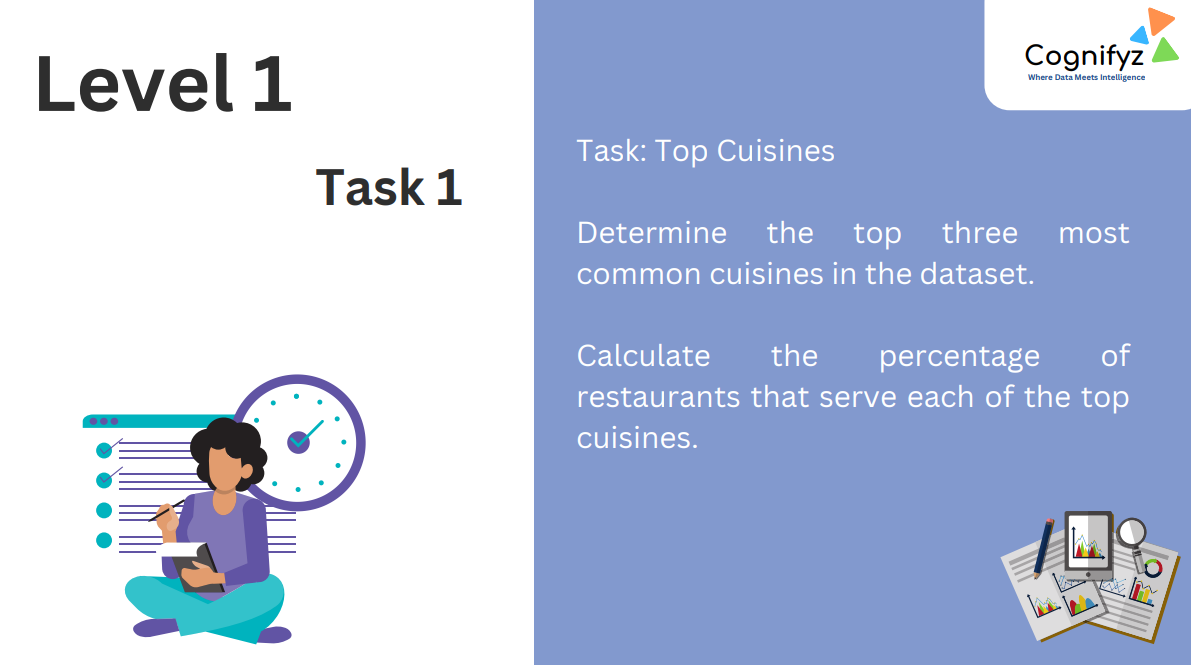

In [3]:
top_Cuisines=Cuisines_counts.head(3)
print("Top 3 most common Cuisines :")
print(top_Cuisines)

#Calculate the percentage of restaurants that serve each of the top cuisines
total_restaurants=df.shape[0];
top_Cuisines_percentage=(top_Cuisines/total_restaurants)*100;
print("\n Percentage of restaurants serving each of the top Cuisines:")
print(top_Cuisines_percentage)

Top 3 most common Cuisines :
Cuisines
North Indian    3960
Chinese         2735
Fast Food       1986
Name: count, dtype: int64

 Percentage of restaurants serving each of the top Cuisines:
Cuisines
North Indian    41.461627
Chinese         28.635745
Fast Food       20.793634
Name: count, dtype: float64


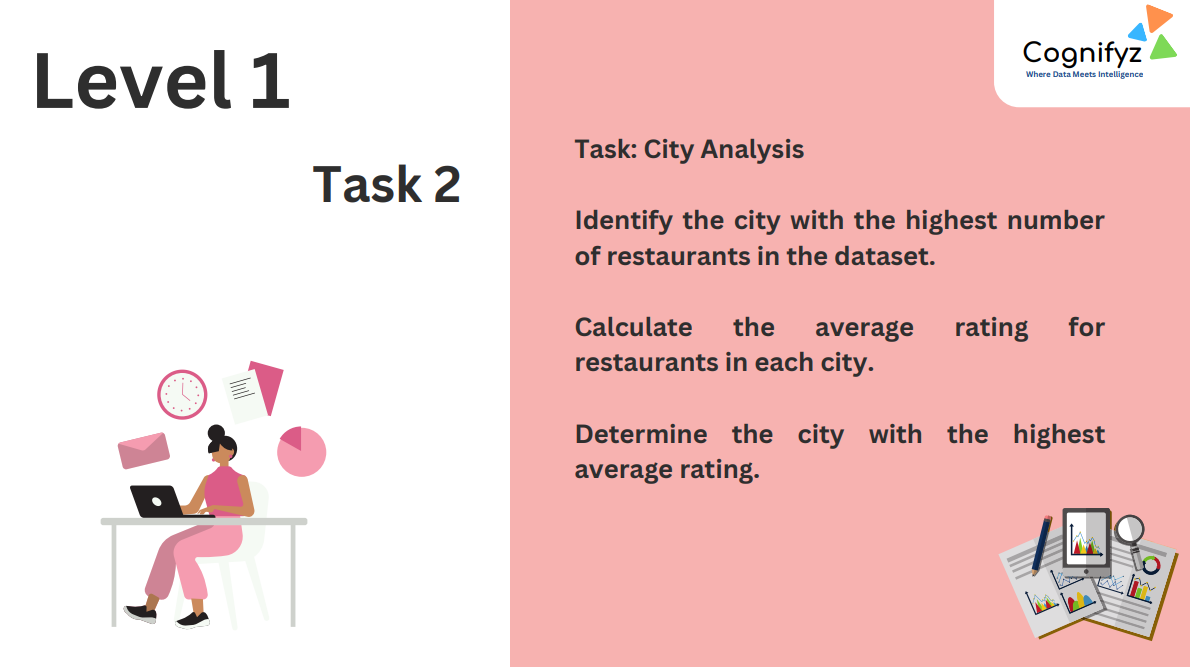

In [4]:
# Identify the city with the highest number of restaurants

city_counts = df['City'].value_counts()
city_with_most_restaurants = city_counts.idxmax()
print(f"The city with the highest number of restaurants is: {city_with_most_restaurants}")

# Calculate the average rating for restaurants in each city

df['Aggregate rating'] = pd.to_numeric(df['Aggregate rating'], errors='coerce')
average_ratings = df.groupby('City')['Aggregate rating'].mean()
print("\nAverage rating for restaurants in each city:")
print(average_ratings)

# Determine the city with the highest average rating
city_with_highest_avg_rating = average_ratings.idxmax()
highest_avg_rating = average_ratings.max()
print(f"\nThe city with the highest average rating is: {city_with_highest_avg_rating} with an average rating of {highest_avg_rating:.2f}")


The city with the highest number of restaurants is: New Delhi

Average rating for restaurants in each city:
City
Abu Dhabi          4.300000
Agra               3.965000
Ahmedabad          4.161905
Albany             3.555000
Allahabad          3.395000
                     ...   
Wellington City    4.250000
Winchester Bay     3.200000
Yorkton            3.300000
brasi_lia          3.495000
stanbul            4.292857
Name: Aggregate rating, Length: 141, dtype: float64

The city with the highest average rating is: Inner City with an average rating of 4.90


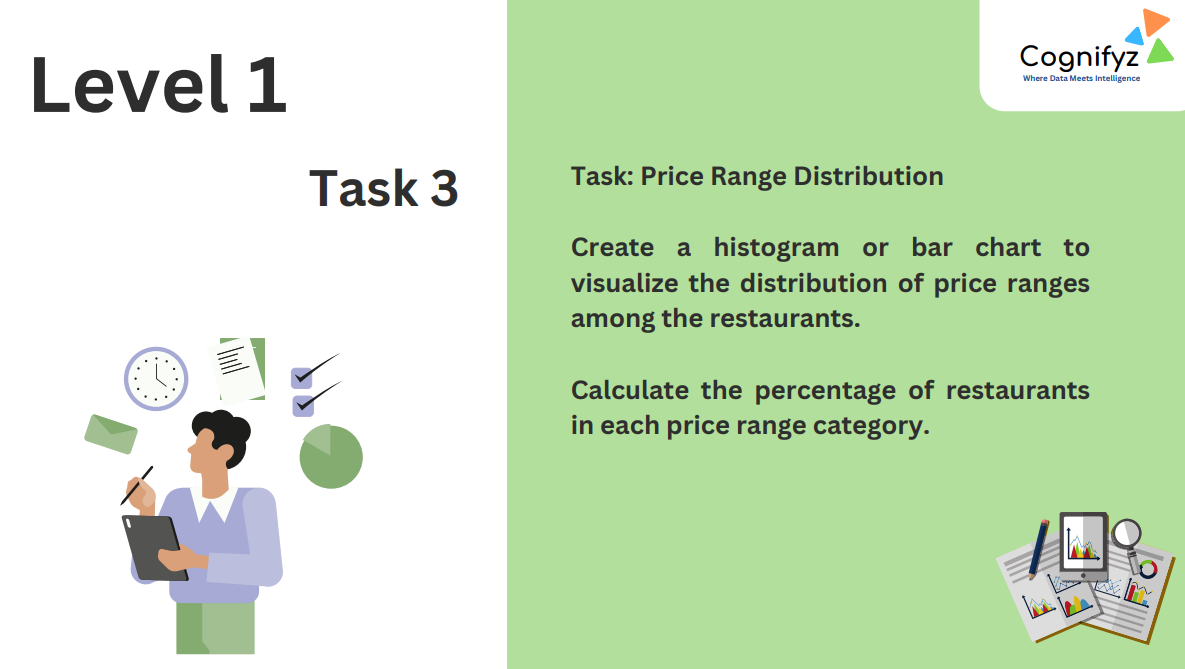

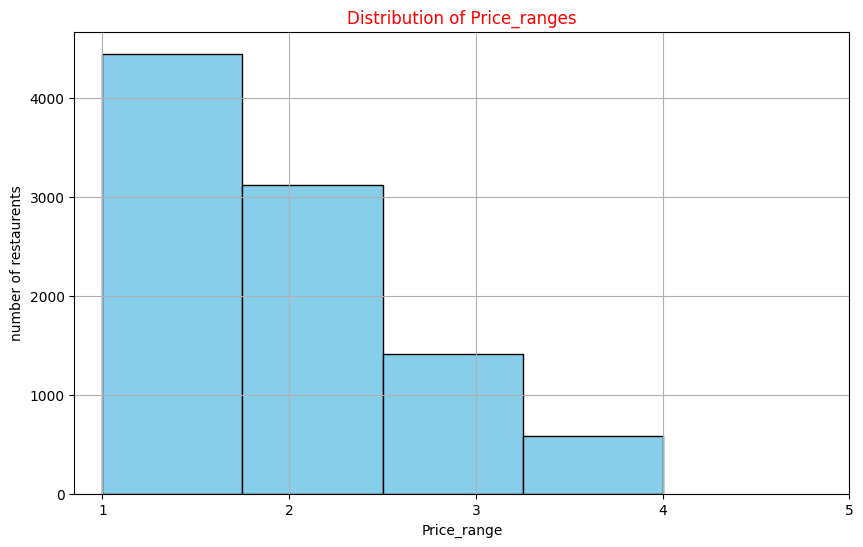

In [5]:
import matplotlib.pyplot as plt


# Plot the distribution of Price_ranges
plt.figure(figsize=(10,6))
df['Price_range'].hist(bins=4,color='skyblue',edgecolor='black')
plt.title("Distribution of Price_ranges",color="red");
plt.xlabel("Price_range");
plt.ylabel("number of restaurents");
plt.xticks(range(1,6));
plt.show()

In [6]:
#Calculate the percentage of restaurants in each Price_range
price_range_counts = df['Price_range'].value_counts().sort_index()
total_restaurants = df.shape[0]
price_range_percentage = (price_range_counts / total_restaurants) * 100

# Display the percentage
print("Percentage of restaurants in each Price_range category:")
print(price_range_percentage)

Percentage of restaurants in each Price_range category:
Price_range
1    46.529159
2    32.593446
3    14.741912
4     6.135483
Name: count, dtype: float64


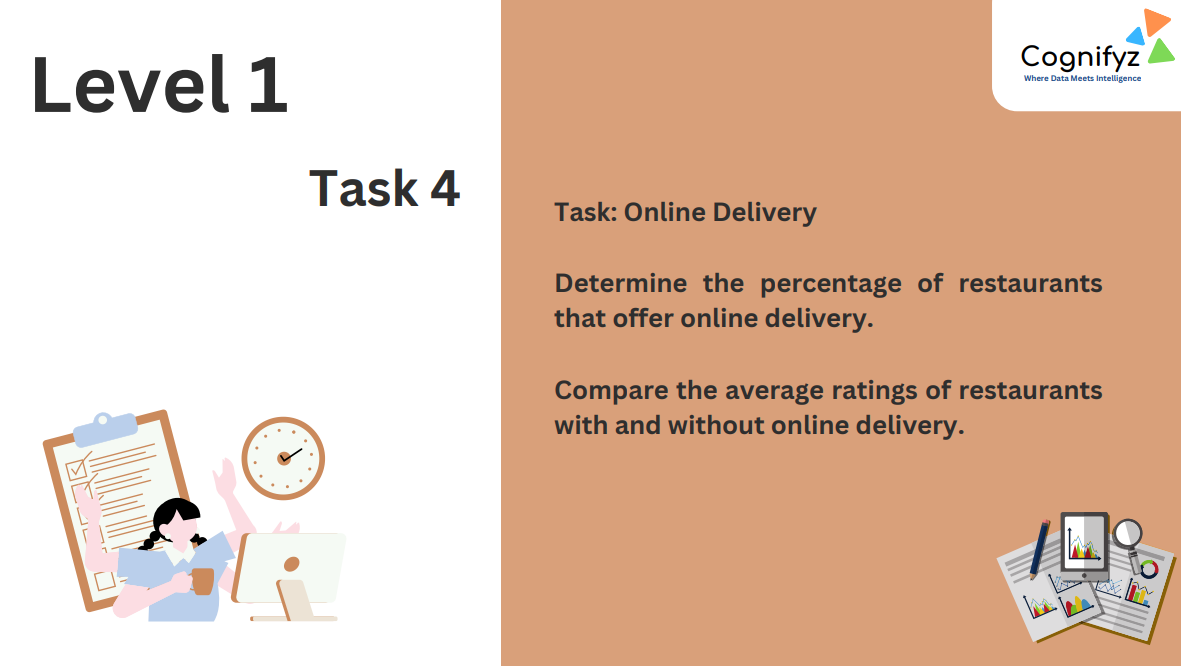

In [7]:
#for code simplification we will access dataset with different naming
input_0=pd.read_csv('Restaurant Dataset.csv')
total_restaurants=len(input_0)
online_delivery_count= input_0[input_0['Has Online delivery']=='Yes'].shape[0]
online_delivery_percentage=(online_delivery_count/total_restaurants)*100

print('total reestaurants :',total_restaurants)
print('Restaurants Count of online delivery :',online_delivery_count)
print('percentage of online delivery :',online_delivery_percentage)

# Compare the average ratings of restaurants with and without online delivery
df['Aggregate rating'] = pd.to_numeric(df['Aggregate rating'], errors='coerce')
df['Has Online delivery'] = pd.to_numeric(df['Has Online delivery'].apply(lambda x:1 if x=='Yes' else 0),errors='coerce')

average_rating_online = df[df['Has Online delivery']==1] ['Aggregate rating'].mean()
average_rating_no_online = df[df['Has Online delivery']==0] ['Aggregate rating'].mean()
print("\n")
print('Average Rating with Online delivery :',average_rating_online)
print('Average Rating with NO-Online delivery :',average_rating_no_online)

total reestaurants : 9551
Restaurants Count of online delivery : 2451
percentage of online delivery : 25.662234321013504


Average Rating with Online delivery : 3.2488372093023257
Average Rating with NO-Online delivery : 2.465295774647887


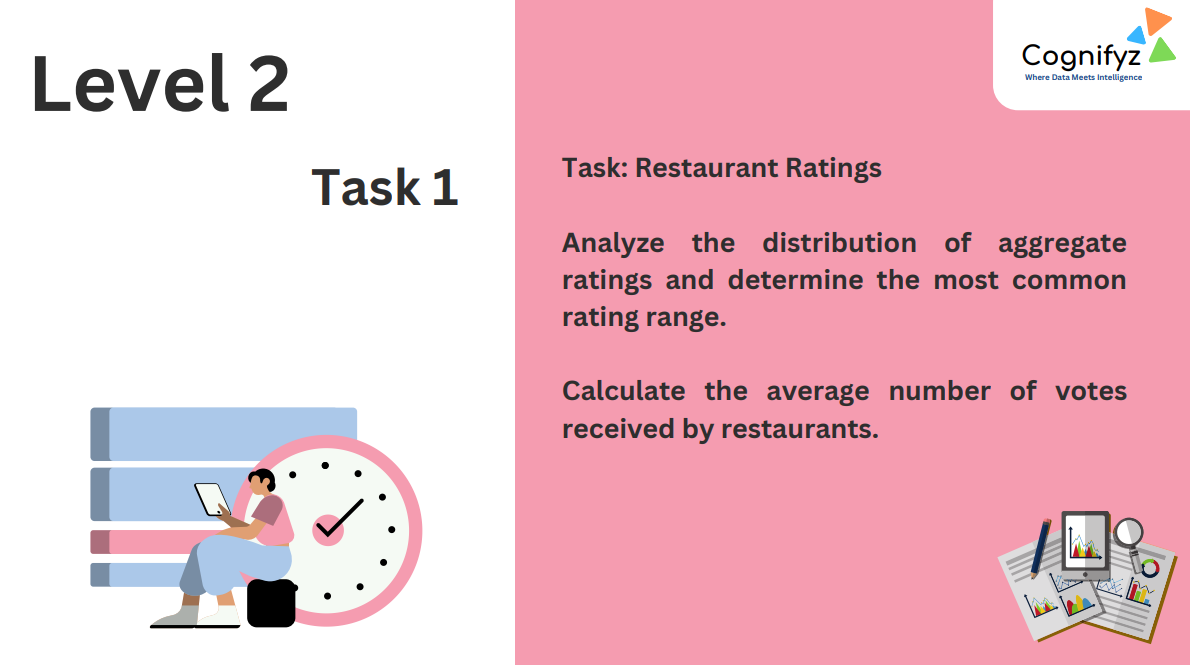

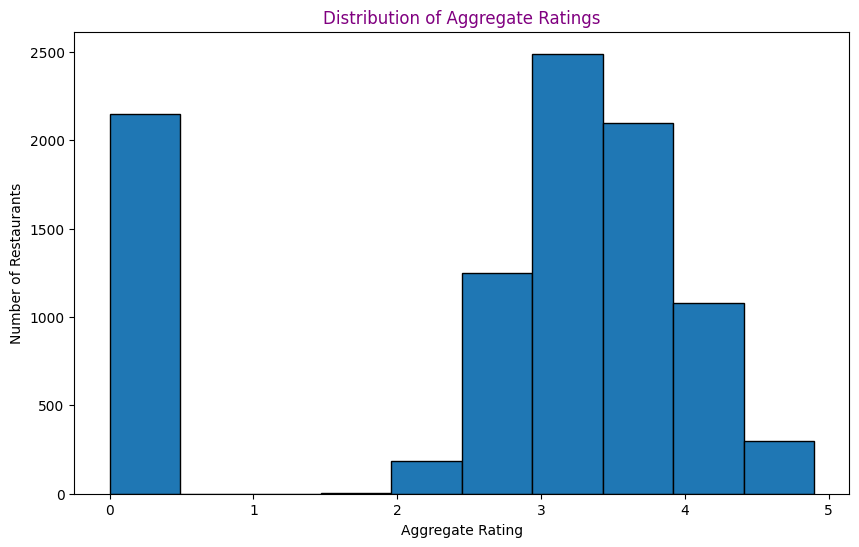

In [8]:

# Ensure 'Aggregate rating' is numeric and handle errors
df['Aggregate rating'] = pd.to_numeric(df['Aggregate rating'], errors='coerce')

# Drop rows with NaN values in 'Aggregate rating'
df = df.dropna(subset=['Aggregate rating'])


plt.figure(figsize=(10, 6))
plt.hist(df['Aggregate rating'], bins=10, edgecolor='black')
plt.title('Distribution of Aggregate Ratings',color='purple')
plt.xlabel('Aggregate Rating')
plt.ylabel('Number of Restaurants')
plt.show()

In [9]:
# Calculate the most common rating range
rating_bins=[0,1,2,3,4,5]
rating_labels=['0-1','1-2','2-3','3-4','4-5']

df['Rating range']=pd.cut(df['Aggregate rating'],bins=rating_bins,labels=rating_labels,right=False)
most_common_rating_range=df['Rating range'].mode()[0]
most_common_rating_range=df['Rating range'].mode()[0]
print("The most common rating range is :",most_common_rating_range)

# Ensure 'Votes' is numeric and handle errors
df['Votes'] = pd.to_numeric(df['Votes'], errors='coerce')

# Drop rows with NaN values in 'Votes'
df = df.dropna(subset=['Votes'])

# Calculate the average number of Votes
average_Votes = df['Votes'].mean()
print(f"The average number of Votes received by restaurants is: {average_Votes:.2f}")

The most common rating range is : 3-4
The average number of Votes received by restaurants is: 156.91


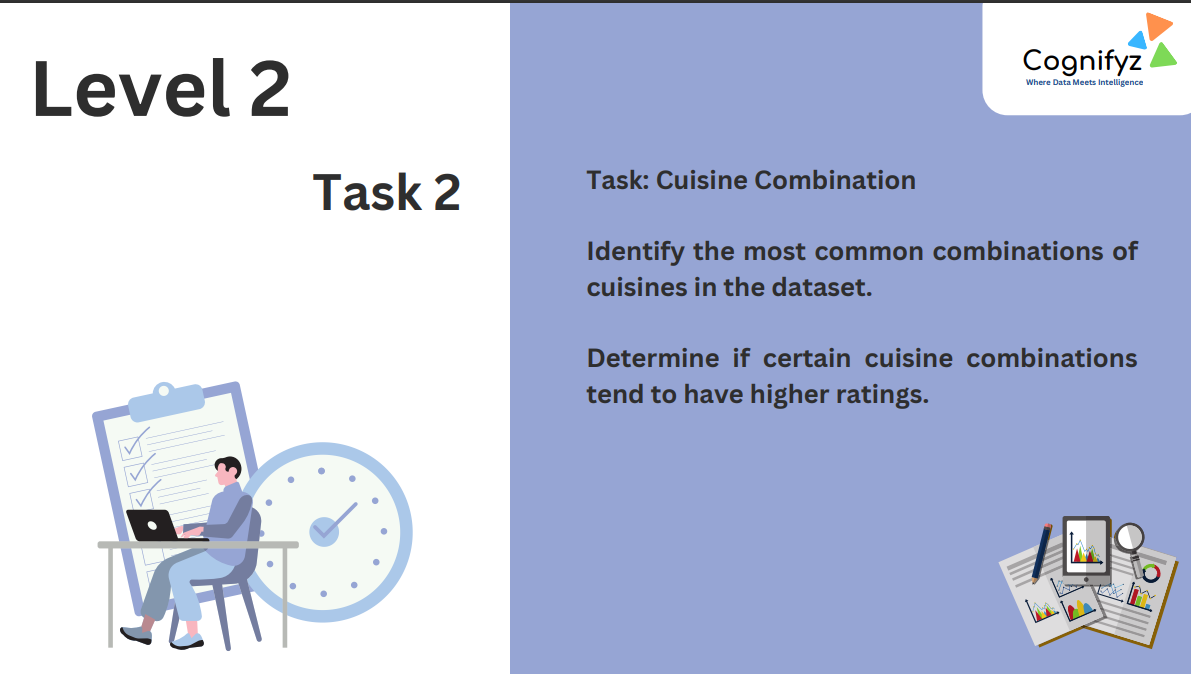

In [10]:

from collections import Counter
from itertools import combinations

# Function to safely split the Cuisines and handle errors
def split_Cuisines(Cuisines):
    try:
        return [c.strip() for c in Cuisines.split(',')]
    except AttributeError:
        return []
# Apply the split function to the 'Cuisines' column
df['Cuisines'] = df['Cuisines'].apply(split_Cuisines)
# Create a Counter object to count the combinations of Cuisines
cuisine_combinations = Counter()
# Count each combination of Cuisines
for Cuisines in df['Cuisines']:
    if len(Cuisines) > 1:
        # Sort the Cuisines to avoid counting ('A', 'B') and ('B', 'A') separately
        cuisine_combinations.update([tuple(sorted(Cuisines))])
# Get the most common cuisine combinations
most_common_combinations = cuisine_combinations.most_common(10)
print("Most common combinations of Cuisines:")
for combination, count in most_common_combinations:
    print(f"{combination}: {count} restaurants")
# Ensure 'Aggregate rating' is numeric and handle errors
df['Aggregate rating'] = pd.to_numeric(df['Aggregate rating'], errors='coerce')
# Create a dictionary to store ratings for each combination of Cuisines
cuisine_combination_ratings = {}
# Populate the dictionary with ratings
for _, row in df.iterrows():
    Cuisines = row['Cuisines']
    rating = row['Aggregate rating']
    if len(Cuisines) > 1 and not pd.isna(rating):
        for combo in combinations(sorted(Cuisines), 2):
            if combo not in cuisine_combination_ratings:
                cuisine_combination_ratings[combo] = []
                cuisine_combination_ratings[combo].append(rating)
# Calculate the average rating for each combination of Cuisines
average_ratings = {combo: sum(ratings) / len(ratings) for combo, ratings in cuisine_combination_ratings.items()}
# Get the top 10 cuisine combinations by average rating
top_rated_combinations = sorted(average_ratings.items(), key=lambda x: x[1],reverse=True)[:10]
print("\nTop 10 cuisine combinations by average rating:")

for combination, avg_rating in top_rated_combinations:
    print(f"\n {combination}: {avg_rating:.2f}")

Most common combinations of Cuisines:

Top 10 cuisine combinations by average rating:


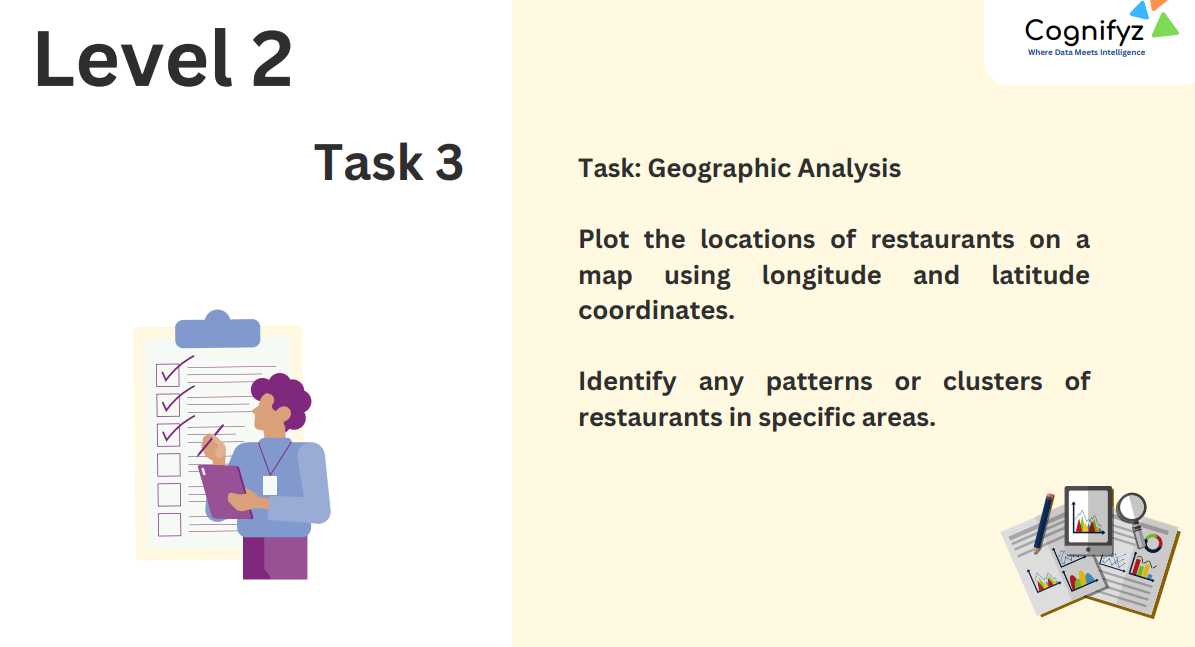

In [11]:
import folium
from sklearn.cluster import DBSCAN
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Extract coordinates
coords = df[['Latitude', 'Longitude']].to_numpy()
# Apply DBSCAN clustering
db = DBSCAN(eps=0.01, min_samples=5, metric='haversine').fit(np.radians(coords))
df['cluster'] = db.labels_
# Create a base map
map = folium.Map(location=[df['Latitude'].mean(), df['Longitude'].mean()], zoom_start=12)
# Generate a color palette
n_clusters = len(set(db.labels_))
colormap = plt.get_cmap('rainbow', n_clusters)
norm = mcolors.Normalize(vmin=0, vmax=n_clusters-1)
# Add points to the map
for idx, row in df.iterrows():
    if not np.isnan(row['Latitude']) and not np.isnan(row['Longitude']):
        cluster_color = mcolors.rgb2hex(colormap(norm(row['cluster'])))
        folium.CircleMarker(
            location=[row['Latitude'], row['Longitude']],
            radius=5,
            popup=f"{row['Restaurant Name']} - Cluster {row['cluster']}",
            color=cluster_color,
            fill=True,
            fill_color=cluster_color
        ).add_to(map)
# Save the map to an HTML file
map.save('restaurants_map_with_clusters.html')

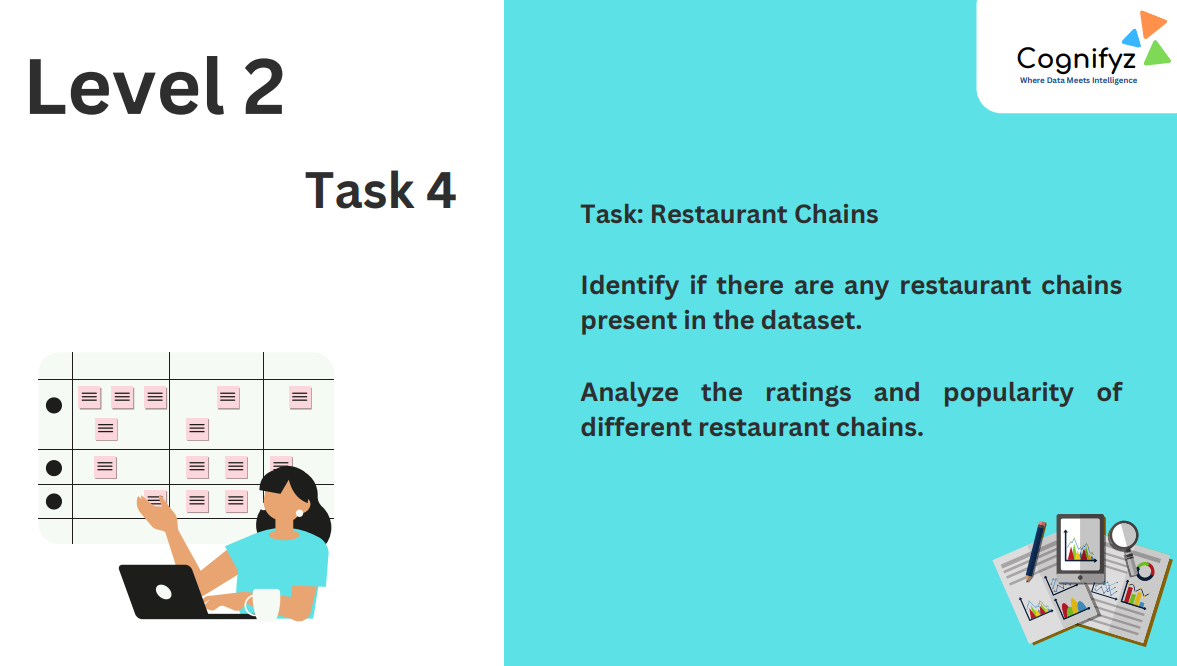

In [12]:
restaurant_counts=df['Restaurant Name'].value_counts()
chains=restaurant_counts[restaurant_counts>1].index.tolist()

df_chains=df[df['Restaurant Name'].isin(chains)];

chain_analysis=df_chains.groupby('Restaurant Name').agg({'Aggregate rating':'mean','Votes':'sum'}).reset_index()


chain_analysis.coloumns=['Restaurant Name','Average Rating','Votes']

chain_analysis=chain_analysis.sort_values(by='Votes',ascending=False)

print(chain_analysis.head(10))

               Restaurant Name  Aggregate rating  Votes
62             Barbeque Nation          4.353846  28142
7    AB's - Absolute Barbecues          4.825000  13400
79                   Big Chill          4.475000  10853
239                 Farzi Cafe          4.366667  10098
692                   Truffles          3.950000   9682
163                    Chili's          4.580000   8156
338               Joey's Pizza          4.250000   7807
83             Big Yellow Door          4.266667   7511
568            Saravana Bhavan          4.133333   7238
614                  Starbucks          3.805556   7139


C:\Users\OM\AppData\Local\Temp\ipykernel_11508\2608589353.py:9: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  chain_analysis.coloumns=['Restaurant Name','Average Rating','Votes']


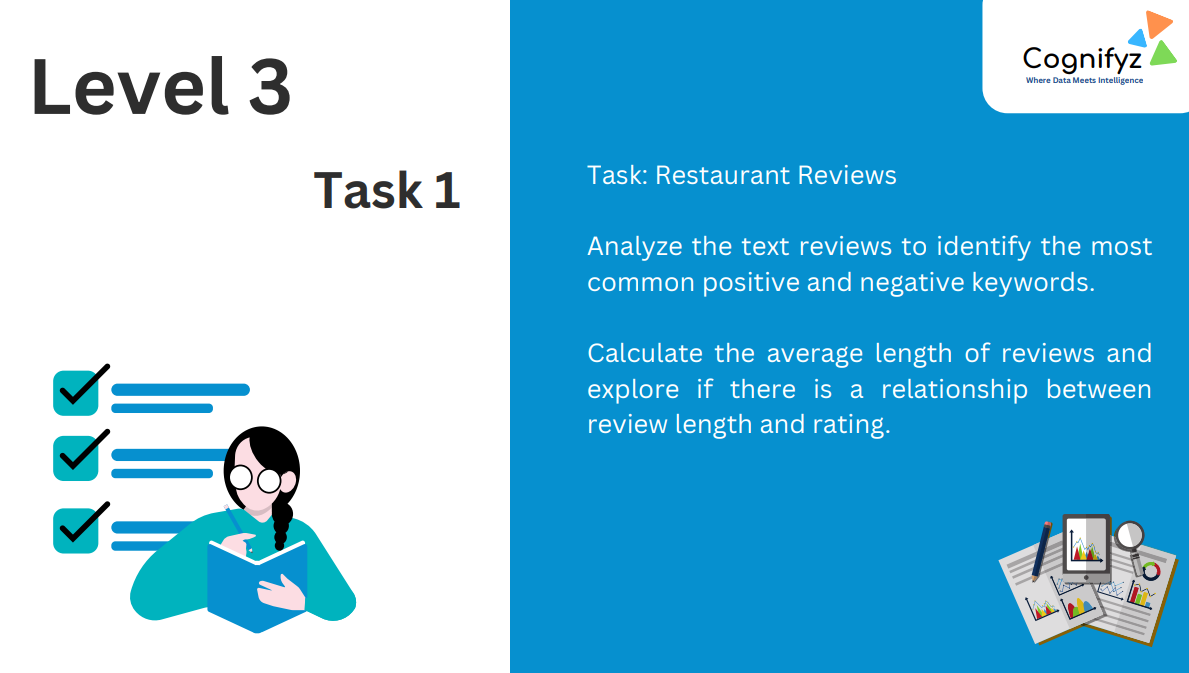

In [13]:
import string
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

# Ensure text reviews are in a column named 'Reviews'

reviews = df['Rating text'].dropna()

# Define a basic list of stopwords
stopwords = set([
'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd",
'your',
'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it',
"it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this',
'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has',
'had',
'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until',
'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before',
'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again',
'further',
'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',
'most',
'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can',
'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren',
"aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't",
'haven',
"haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan',
"shan't",
'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"
])
# Define a function for preprocessing text
def preprocess_text(text):
    text = text.lower() # Convert to lowercase
    text = text.translate(str.maketrans('', '', string.punctuation)) # Remove punctuation
    words = text.split() # Split text into words
    words = [word for word in words if word not in stopwords] # Remove stopwords
    return ' '.join(words)
# Preprocess the reviews
reviews_clean = reviews.apply(preprocess_text)
# Tokenize and count word frequencies
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(reviews_clean)
word_freq = pd.DataFrame(X.toarray(),
columns=vectorizer.get_feature_names_out()).sum().sort_values(ascending=False)
# Display the most common keywords
print("Most Common Keywords:")
word_freq



Most Common Keywords:


average      3737
good         3179
rated        2148
excellent     301
poor          186
dtype: int64

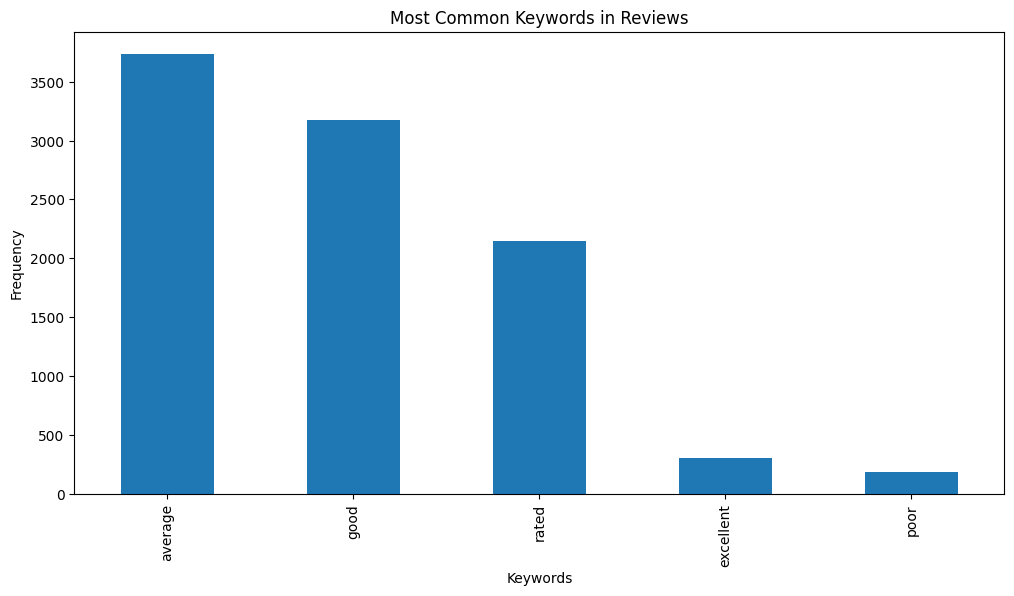

In [14]:
# Visualize the common keywords

word_freq.head(20).plot(kind='bar', figsize=(12, 6))
plt.title('Most Common Keywords in Reviews')
plt.xlabel('Keywords')
plt.ylabel('Frequency')
plt.show()

In [15]:
# Analyze the sentiment (for demonstration purposes, we use basic sentiment keywords)
positive_keywords = ['good', 'great', 'excellent', 'amazing', 'wonderful', 'best']
negative_keywords = ['bad', 'terrible', 'awful', 'worst', 'poor', 'disappointing']
# Calculate frequency of positive and negative keywords
positive_freq = word_freq[word_freq.index.isin(positive_keywords)]
negative_freq = word_freq[word_freq.index.isin(negative_keywords)]
print("most common positive Keywords:")
print(positive_freq)
print("\n most common negative Keywords:")
print(negative_freq)

most common positive Keywords:
good         3179
excellent     301
dtype: int64

 most common negative Keywords:
poor    186
dtype: int64


In [16]:

# Calculate average review length
df['Review Length'] = reviews.apply(lambda x: len(x.split()))
# Calculate average review length
average_review_length = df['Review Length'].mean()
print(f"\nAverage Review Length: {average_review_length:.2f} words")
# Calculate average review length by rating



Average Review Length: 1.34 words


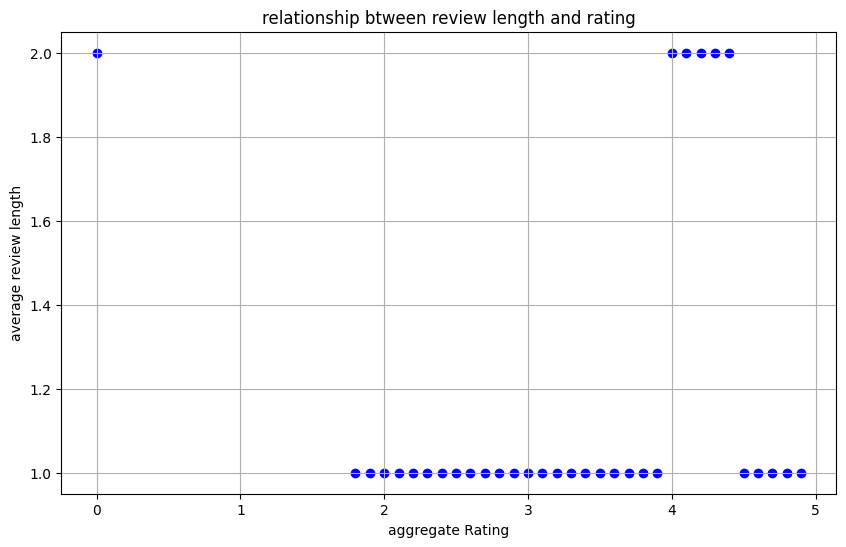

In [17]:
length_by_rating = df.groupby('Aggregate rating')['Review Length'].mean().reset_index()
# Plot the relationship between review length and rating
plt.figure(figsize=(10, 6))
plt.scatter(length_by_rating['Aggregate rating'], length_by_rating['Review Length'], color='blue')
plt.title('relationship btween review length and rating')
plt.xlabel('aggregate Rating')
plt.ylabel('average review length')
plt.grid(True)
plt.show()

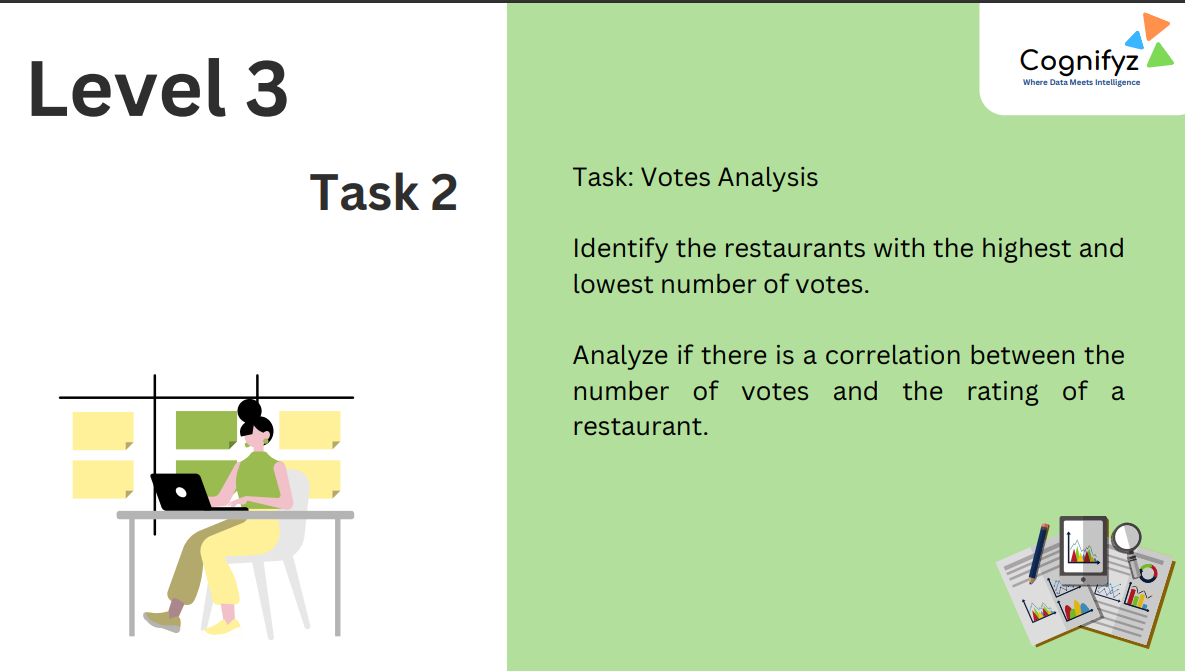

In [18]:

# Identify restaurants with the highest and lowest number of Votes
highest_Votes_restaurant = df.loc[df['Votes'].idxmax()]
lowest_Votes_restaurant = df.loc[df['Votes'].idxmin()]

print("\n Restaurant with the Highest Number of Votes:")
print(highest_Votes_restaurant[['Restaurant Name', 'Votes', 'Aggregate rating']])

print("\n Restaurant with the Lowest Number of Votes:")
print(lowest_Votes_restaurant[['Restaurant Name', 'Votes', 'Aggregate rating']])



 Restaurant with the Highest Number of Votes:
Restaurant Name      Toit
Votes               10934
Aggregate rating      4.8
Name: 728, dtype: object

 Restaurant with the Lowest Number of Votes:
Restaurant Name     Cantinho da Gula
Votes                              0
Aggregate rating                 0.0
Name: 69, dtype: object



 Correlation between Number of Votes and Aggregate Rating: 0.31




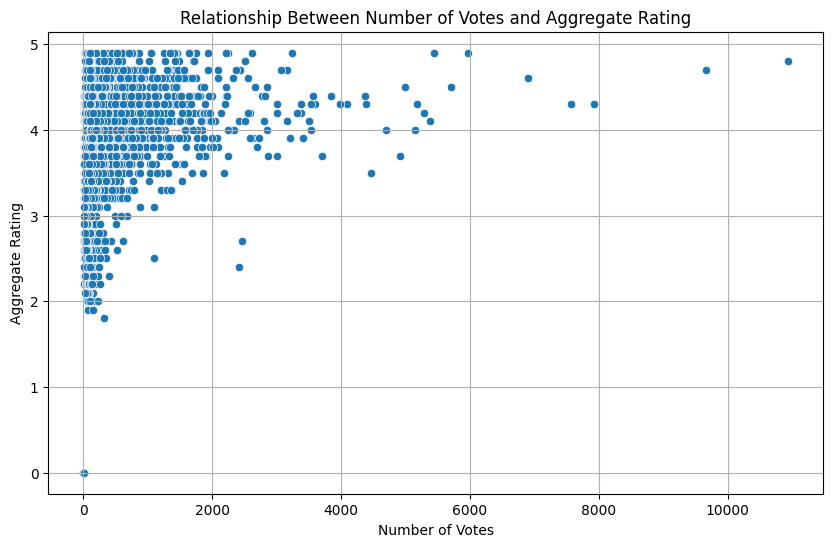

In [19]:


import seaborn as sns
# Analyze the correlation between the number of Votes and the rating
correlation = df['Votes'].corr(df['Aggregate rating'])
print(f"\n Correlation between Number of Votes and Aggregate Rating: {correlation:.2f}")
print("\n")
# Plot the relationship between Votes and aggregate rating
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Votes', y='Aggregate rating', data=df)
plt.title('Relationship Between Number of Votes and Aggregate Rating')
plt.xlabel('Number of Votes')
plt.ylabel('Aggregate Rating')
plt.grid(True)
plt.show()

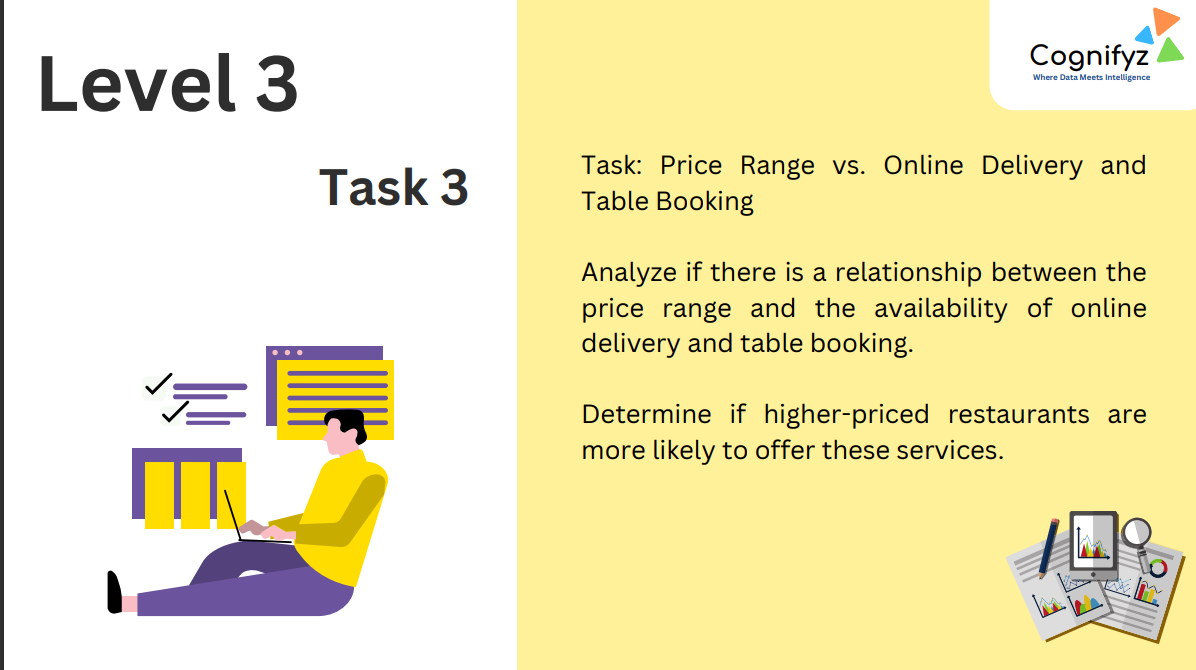

In [20]:


# Ensure 'Price_range', 'Has Online delivery', and 'Has Table booking' columns are in the correct format
df['Price_range'] = df['Price_range'].astype(int)
df['Has Online delivery'] = df['Has Online delivery'].map({'Yes': 1, 'No': 0})
df['Has Table booking'] = df['Has Table booking'].map({'Yes': 1, 'No': 0})
# Group by Price_range and calculate the percentage of restaurants that offer online delivery and table booking
price_range_groups = df.groupby('Price_range').agg({
    'Has Online delivery': 'mean',
    'Has Table booking': 'mean'
}).reset_index()

# Convert to percentage
price_range_groups['Has Online delivery'] *= 100
price_range_groups['Has Table booking'] *= 100
# Display the results
print("Percentage of Restaurants Offering Online Delivery and Table Booking by Price_range:")
print(price_range_groups)



Percentage of Restaurants Offering Online Delivery and Table Booking by Price_range:
   Price_range  Has Online delivery  Has Table booking
0            1                  NaN           0.022502
1            2                  NaN           7.677482
2            3                  NaN          45.738636
3            4                  NaN          46.757679


In [21]:
# Calculate the correlation between Price_range and availability of services
correlation_online_delivery = df['Price_range'].corr(df['Has Online delivery'])
correlation_table_booking = df['Price_range'].corr(df['Has Table booking'])
print(f"\nCorrelation between Price_range and Online Delivery:{correlation_online_delivery:.2f}")
print(f"Correlation between Price_range and Table Booking: {correlation_table_booking:.2f}")


Correlation between Price_range and Online Delivery:nan
Correlation between Price_range and Table Booking: 0.50
